# Mod 4 Assessment Review
Agenda Today:
- Principal Component Analysis
- Clustering
- Natural Language Processing
- Time Series


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns

## Part I. PCA

In [2]:
# Import the mpg dataset and build pca
mpg = sns.load_dataset('mpg')
# what are some of the steps to build pca?
mpg_features = mpg.iloc[:,:5]
# step 1 - standardize and scale
scaler = StandardScaler()
mpg_scaled = pd.DataFrame(scaler.fit_transform(mpg_features), columns=mpg_features.columns)
mpg_scaled.dropna(axis = 0, inplace = True)

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg_features.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [5]:
# step 2 fit our pca
mpg_pca = PCA(n_components = .9) #90% of variance explained 
#Without specifying components it will return all features
mpg_pca.fit(mpg_scaled)

PCA(n_components=0.9)

In [6]:
mpg_pca.n_components_

2

#### What are some of the advantages and disadvantages of using PCA?

PCA is a unsupervised learning technique that creates a linear combination of the OG variables to explain the variance of the data.

Eigenvalue = The amount of variance explained by each principle component
Eigenvector = Is the direction of each eigenvalue


Pros: 
* Dimensionaily Reduction
* Removes Correlated Features (Multicolinearity) 
* Improves Algorithm Performance
* Reduces Overfitting
* Improves Visualization

Cons:
* Can only be used for continuious features.
* Independent variables become less interpretable
* Data standardization is must before PCA, thus losing interpretability
* Information Loss

## Part II. Clustering

- Describe the algorithm of Hierarchical Clustering 
- Describe the algorithm of [K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) Clustering 


Heavier focus on K-Means

Unsupervised learning algorithm to find underlying patterns in data if there are similairity in the observations. No ground truths.

Hierarchial Clustering:
* Bottom up clustering technique, prioritizing individual similarities.
* This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left. Results shown using dendrogram.

K-Means Clustering:
* Better to have predefined idea of cluster to input 'K'
* Top down clustering technique, prioritizing centroids.
* K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in the following steps :

    * Specify the desired number of clusters K.
    * Randomly assign each data point to a cluster.
    * Calculate distance for every observation and assign membership of observation to proper clusters.
    * Compute cluster centroids, mean of each cluster to update position of centroid.
    * Re-assign each point to the closest cluster centroid.
    * Re-compute cluster centroids.
    * Repeat previous two steps until no improvements are possible : Similarly, we’ll repeat the previous two steps until we’ll reach global optima. When there will be no further switching of data points between two clusters for two successive repeats. It will mark the termination of the algorithm if not explicitly mentioned.

In [7]:
# building a k-means clustering model 
kmeans = KMeans(n_clusters = 3) #number of K
kmeans.fit(mpg_scaled) #Must standarize and scale

KMeans(n_clusters=3)

In [8]:
# we can get the labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,

# What are some of the ways to evaluate k-means?
Silhouette Score - Minimize distance within clusters and Maximize distance across different clusters
Ratio of inter to intra to be large.
Silhouette score = (b-a)/max(b,a) 
Silohoette score ranges for [-1,1] The closer to 1 the better defined the cluster is.

Visualize validation curve from elbow plot.

# How to select the best value of k using those metrics?
Use the elbow method plot


## Part III. Natural Language Processing 
- What are some of the ways in which we can engineer features in NLP?
- What is TF-IDF, how is it calculated? What does it represent?

Preprocessing:
* Stemming and lemonization (remove inflection of words)

Feature Engineering:
* Vectorize using Bag of Words (each unique token is a feature/column, and each document is an observation, in the cells is the frequency of the word.
* Doesn't weigh the importance/context of the word.


* TF-IDF Term Frequency Inverse Document Frequency
* IDF how unique/important a word is 
* The higher the score the more important/unique the word is
* idf = log(# of documents / # of documents contaning word 'x')

In [9]:
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [10]:
# what are some of the steps to engineer the features?

# stop words removal
stopwords = stopwords.words('english')
# what if you need to remove more stopwords than this collection?

# use tfidf 
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords)

#^ngram= start with unigram and ends with bigram

## could you add some optional parameters to that?

vectorizer.fit_transform(df['review'])

<4x686 sparse matrix of type '<class 'numpy.float64'>'
	with 729 stored elements in Compressed Sparse Row format>

**Interpretation of TFIDF** 

What does a high value of TFIDF tell you about a certain word?

In [11]:
type(stopwords)

list

In [12]:
# what are the step by step process of doing text classification

# step 1 - train test split #DO THIS FIRST BEFORE CLEANING

# step 2 - tokenizing, feature engineering etc etc

# step 3 - fit the model to the training set, test the model on the testing set

# step 4 - output prediction on testing set, compare true labels to predicted labels, get accuracy

## Part IV. Time Series

In [13]:
ts = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [14]:
ts.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [15]:
# covert the date to datetime 
ts.info()

# your code below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [16]:
ts['date'] = pd.to_datetime(ts['Date'])
ts

,Date,Temp,date
0,1981-01-01,20.7,1981-01-01
1,1981-01-02,17.9,1981-01-02
2,1981-01-03,18.8,1981-01-03
3,1981-01-04,14.6,1981-01-04
4,1981-01-05,15.8,1981-01-05
...,...,...,...
3645,1990-12-27,14.0,1990-12-27
3646,1990-12-28,13.6,1990-12-28
3647,1990-12-29,13.5,1990-12-29
3648,1990-12-30,15.7,1990-12-30


In [17]:
# set the index to date
ts = ts.set_index('Date')

In [18]:
# visualize the daily temperature 
ts

,Temp,date
Date,,
1981-01-01,20.7,1981-01-01
1981-01-02,17.9,1981-01-02
1981-01-03,18.8,1981-01-03
1981-01-04,14.6,1981-01-04
1981-01-05,15.8,1981-01-05
...,...,...
1990-12-27,14.0,1990-12-27
1990-12-28,13.6,1990-12-28
1990-12-29,13.5,1990-12-29


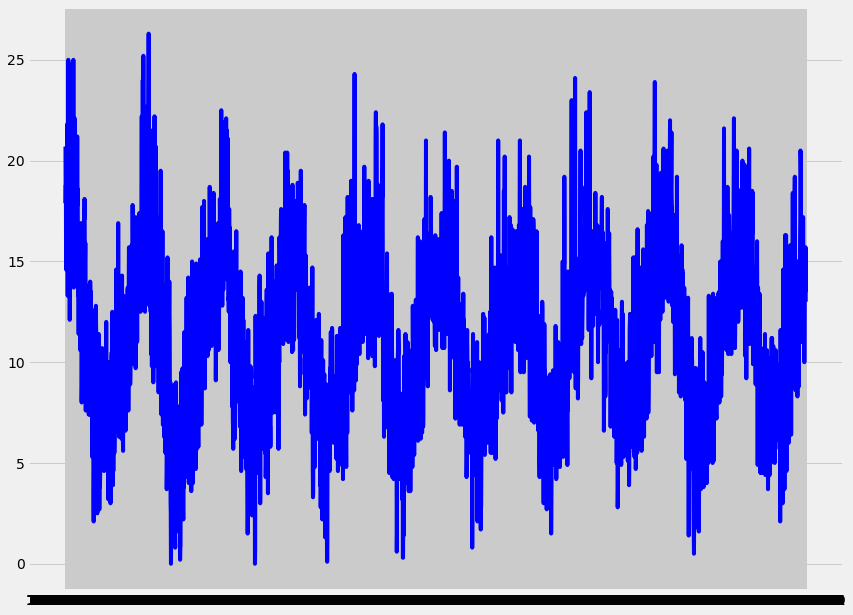

In [19]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(ts['Temp'], color='blue',label='Daily temperature')

In [20]:
# get only the monthly mean 
temp_monthly = ts.resample('MS').mean()
temp_monthly

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
temp_monthly.rolling(window = 3).mean()

## what are some of the assumptions of using arima model? 
* Stationarity
* Doesn't account for seasonailty

# does our dataset satisfy this assumption?

# what kind of test can you use to find out?
* Dickey-Fuller test

# Do a dickey fuller test to find out whether our dataset is stationary or not
* Hypotthesis test that shows us if there is a shock
* Null Hypothesis is that there is no stationarity present in data
* We want to reject the Null, thus a small p-value (probabilty of observing the given result or more extreme)